# Hyperparameter Tuning

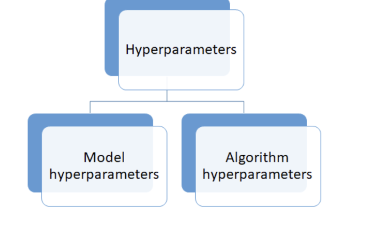

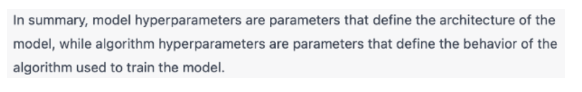

### **Hyperparameters**

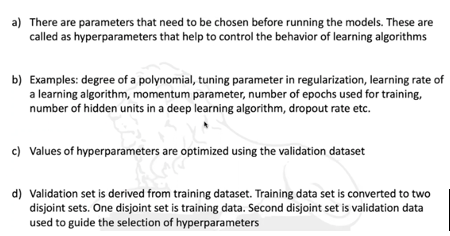

- **Learning rate** controls size of weight updates
- **Momentum** controls direction & acceleration of weight updates to accelerate convergence & prevent oscillation during training. During training, the momentum parameter helps the optimizer to overcome local minima by allowing the optimizer to build up velocity in directions that are consistent with the gradients of previous updates. This helps the optimizer to navigate through areas of high curvature in the loss function more efficiently and accelerate convergence.

## Types of Hyperparameter Tuning

### Grid Search and Random Search

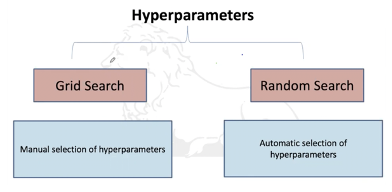

Both grid-search and random-search evaluate the validation set error and return the best configuration.

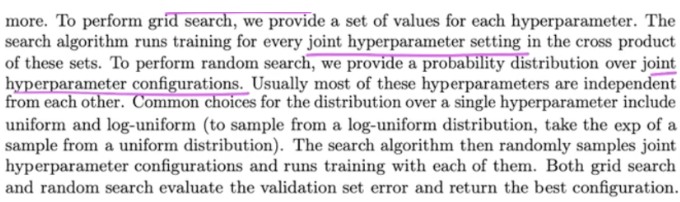

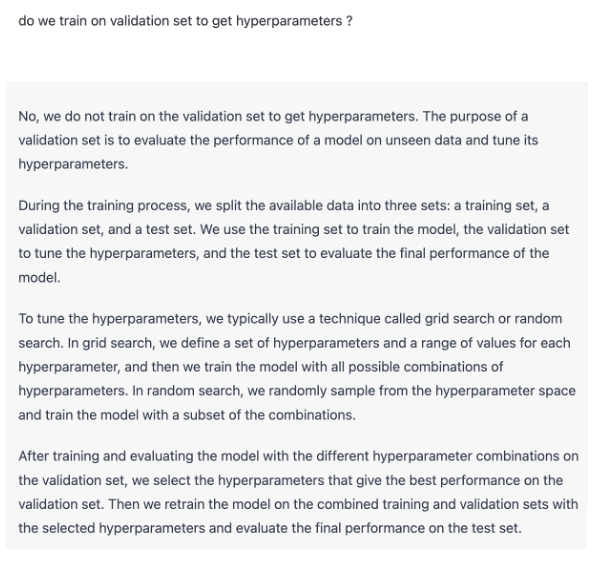

### Why do we have uniform distribution for random search of a hyperparameter ?

Common choices for distribution over single hyperparameter include uniform and log-uniform so each values of the hyperparameter has an equally likely chance of being picked.

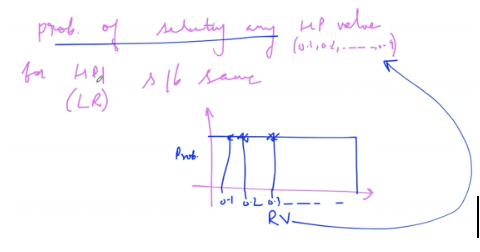

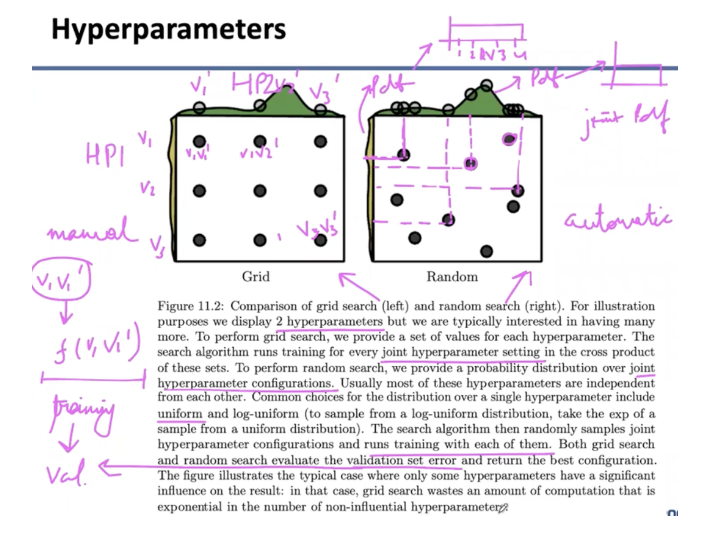

- In grid search all possible combination of parameters are tried.
- In random search u pick values randomly from the distribution of that hyperparameter.In random search in few searches/combinations u may get same performance as u may get in a lot of searches in grid search. 
- First u do Random Search & then u do grid search, this is always case in Hyperparameter tuning.

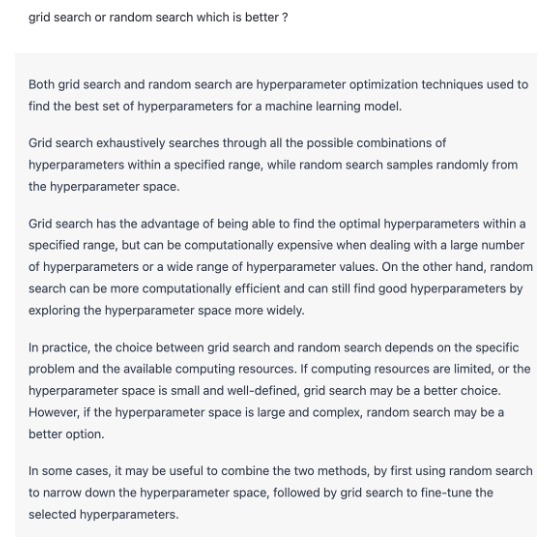

## Grid & Random Search

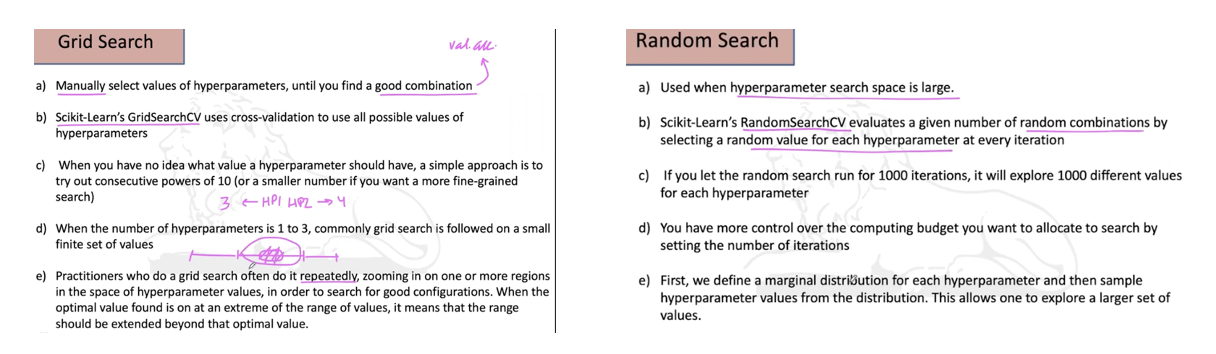

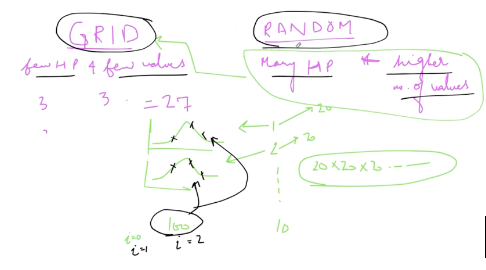

**Import Libraries**

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

                                    
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('datasets/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
ohe = pd.get_dummies(data.drop(columns=['age','bmi','children','expenses']), drop_first=True) 

x = data.drop(columns='expenses')
y = data['expenses']

ohe_x = pd.concat([x, ohe], axis=1)
ohe_x = ohe_x.drop(columns=['sex','smoker','region'])
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0,1,0,0,1
1,18,33.8,1,1,0,0,1,0
2,28,33.0,3,1,0,0,1,0
3,33,22.7,0,1,0,1,0,0
4,32,28.9,0,1,0,1,0,0


In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe_x, y, test_size = .2, random_state=3)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1070, 8), (1070,), (268, 8), (268,))

# When not doing hyperparameter Tuning (Baseline)


In [5]:
model = DecisionTreeRegressor(max_depth=7).fit(xtrain, ytrain) 

- max_depth is one of the hyper parameter 
- max_depth has to be defined otherwise tree will be very large & complicated coz it tries to split every node which leads to  overfitting
- In above case max_depth is assumed to be 7


In [6]:
ypred_test = model.predict(xtest)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred_test)))
print('R2_score: %.2f' % (r2_score(ytest, ypred_test)))


RMSE: 5180.68
R2_score: 0.82


# Ways to find hyper-parameter (max_depth) values
# **Grid Search CV**

#### Tuning single hyper parameter

In [7]:
params = {'max_depth':list(range(2,20))} # specifying the range for max_depths to create multiple trees
params


{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [8]:
dtr = DecisionTreeRegressor()

# scoring of 'r2' refers to metrics.r2_score
gs = GridSearchCV(estimator=dtr, 
                  param_grid=params, 
                  scoring='r2', cv=5).fit(xtrain, ytrain)

##### Manual
gs.best_params_, gs.best_score_

({'max_depth': 4}, 0.8449212957688363)

In [9]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_

df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001218,0.000249,0.000653,0.000096,2,{'max_depth': 2},0.857962,0.821586,0.799544,0.832458,0.774093,0.817129,0.028578,5
1,0.001131,0.000005,0.000600,0.000009,3,{'max_depth': 3},0.871974,0.840703,0.829108,0.860573,0.813413,0.843154,0.021080,2
2,0.001241,0.000006,0.000592,0.000009,4,{'max_depth': 4},0.874799,0.847134,0.823459,0.864164,0.815051,0.844921,0.022894,1
3,0.001353,0.000007,0.000591,0.000005,5,{'max_depth': 5},0.880109,0.838715,0.821493,0.849318,0.819683,0.841863,0.022069,3
4,0.001459,0.000005,0.000589,0.000004,6,{'max_depth': 6},0.854750,0.832303,0.810864,0.819065,0.828958,0.829188,0.014842,4


In [10]:
df_cv_results.tail()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.002370,0.000024,0.000600,0.000008,15,{'max_depth': 15},0.726549,0.759576,0.667052,0.676947,0.650076,0.696040,0.040707,13
14,0.002380,0.000023,0.000599,0.000005,16,{'max_depth': 16},0.705442,0.773487,0.699034,0.667953,0.629649,0.695113,0.047514,15
15,0.002387,0.000032,0.000605,0.000008,17,{'max_depth': 17},0.708456,0.745868,0.687198,0.671013,0.667871,0.696081,0.028757,12
16,0.002382,0.000030,0.000601,0.000007,18,{'max_depth': 18},0.709164,0.759559,0.697789,0.669681,0.647706,0.696780,0.038048,11
17,0.002393,0.000034,0.000602,0.000010,19,{'max_depth': 19},0.673680,0.760938,0.691037,0.658320,0.628593,0.682514,0.044258,18


In [11]:
df_cv_results.iloc[2]

mean_fit_time                0.001241
std_fit_time                 0.000006
mean_score_time              0.000592
std_score_time               0.000009
param_max_depth                     4
params               {'max_depth': 4}
split0_test_score            0.874799
split1_test_score            0.847134
split2_test_score            0.823459
split3_test_score            0.864164
split4_test_score            0.815051
mean_test_score              0.844921
std_test_score               0.022894
rank_test_score                     1
Name: 2, dtype: object

Above result has a rank of 1

In below figure, if based on validation data u get depth as 4 to be best then the function which u obtain from model trained on depth=4 will be used for testing on unknown data.

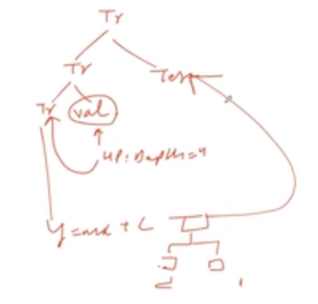

## *Note1*

### <font color=blue>*Only use CV when u want to tune hyperparameters else not required.*

## *Note2*


### <font color=blue>*Only CV, without Hyperparameter Tuning, is an alternative to Single Train-Test Split. In that case anyways you will be having 5 folds of data on which you work including pre-processing etc everything done based on 5 folds and in whichever split you get the best accuracy u use it further so u pick model/function for that split only & also use that to test on unknown data*

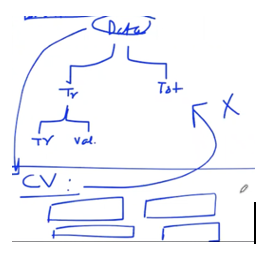

## *Note3*


### <font color=blue>*In LHS figure you have CV without any Cross Validation, so inorder to choose model for prediction on unseen data, you can choose estimator from whichever split gives u best accuracy while on RHS you choose the model based on Hyperparameter Tuning i.e. the model corresponding to best hyperparameters will be used for prediction on unknown data*

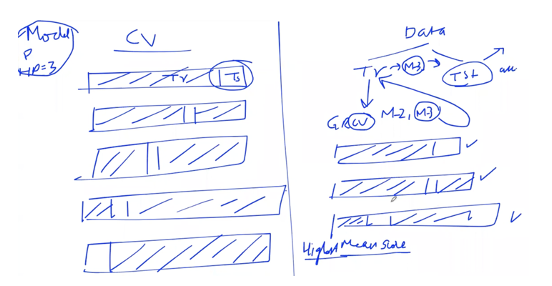

####  By default we get only test scores but if we want training scores as well we need to add additional parameter 'return_train_score=True' 

In [12]:
gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5, return_train_score=True).fit(xtrain, ytrain)
gs.best_params_, gs.best_score_


({'max_depth': 4}, 0.8449212957688363)

In [13]:
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001311,0.000390,0.000661,0.000085,2,{'max_depth': 2},0.857962,0.821586,0.799544,0.832458,...,0.817129,0.028578,5,0.818996,0.827717,0.831257,0.823484,0.836264,0.827543,0.005990
1,0.001146,0.000046,0.000581,0.000020,3,{'max_depth': 3},0.871974,0.840703,0.829108,0.860573,...,0.843154,0.021080,2,0.848865,0.857754,0.860768,0.850968,0.862354,0.856142,0.005335
2,0.001210,0.000004,0.000567,0.000011,4,{'max_depth': 4},0.874799,0.847134,0.823459,0.864164,...,0.844921,0.022894,1,0.863599,0.869582,0.874635,0.868835,0.875272,0.870385,0.004267
3,0.001329,0.000013,0.000573,0.000010,5,{'max_depth': 5},0.880109,0.838715,0.821493,0.849318,...,0.841863,0.022069,3,0.875766,0.885925,0.889776,0.882247,0.885487,0.883840,0.004691
4,0.001511,0.000109,0.000594,0.000024,6,{'max_depth': 6},0.854750,0.832303,0.810864,0.819216,...,0.825713,0.016451,4,0.891620,0.901563,0.907016,0.898054,0.902988,0.900248,0.005183


# Plot mean train and test scores

In [14]:
mean_train_scores = df_cv_results['mean_train_score']
mean_test_scores   = df_cv_results['mean_test_score']
max_depths = df_cv_results['param_max_depth']

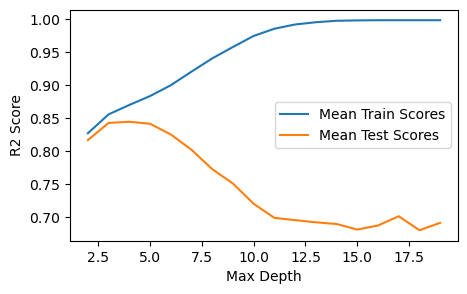

In [15]:
plt.figure(figsize=(5,3))
plt.plot(max_depths, mean_train_scores, label='Mean Train Scores')
plt.plot(max_depths, mean_test_scores, label ='Mean Test Scores')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend();

* Above chart implies how the train and test scores varies upon changes in max_depths
* max_depth below 4 could underfit 
* max_depth above 4 could overfit

## Predicting best r2 score using test with best estimator

In [16]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=4)

In [17]:
ypred_test = gs.best_estimator_.predict(xtest)
print('R2 Score : %.2f' % r2_score(ytest, ypred_test))

R2 Score : 0.87


## Tuning multiple hyper parameters
* Performing cross multiplication

In [18]:
params = {'max_depth':list(range(2,7)), 'min_samples_split':[5,10,15]}

for x in params['max_depth']:
    for y in params['min_samples_split']:
        print(x, y)
    print('-'*100)

2 5
2 10
2 15
----------------------------------------------------------------------------------------------------
3 5
3 10
3 15
----------------------------------------------------------------------------------------------------
4 5
4 10
4 15
----------------------------------------------------------------------------------------------------
5 5
5 10
5 15
----------------------------------------------------------------------------------------------------
6 5
6 10
6 15
----------------------------------------------------------------------------------------------------


In [19]:
dtr = DecisionTreeRegressor()

gs = GridSearchCV(estimator=dtr, param_grid=params, scoring='r2', cv=5).fit(xtrain, ytrain)

##### Manual
gs.best_params_, gs.best_score_

({'max_depth': 4, 'min_samples_split': 5}, 0.8449212957688363)

In [20]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(gs.cv_results_)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001169,0.000190,0.000623,0.000024,2,5,"{'max_depth': 2, 'min_samples_split': 5}",0.857962,0.821586,0.799544,0.832458,0.774093,0.817129,0.028578,13
1,0.001055,0.000006,0.000606,0.000007,2,10,"{'max_depth': 2, 'min_samples_split': 10}",0.857962,0.821586,0.799544,0.832458,0.774093,0.817129,0.028578,13
2,0.001049,0.000006,0.000599,0.000002,2,15,"{'max_depth': 2, 'min_samples_split': 15}",0.857962,0.821586,0.799544,0.832458,0.774093,0.817129,0.028578,13
3,0.001172,0.000017,0.000611,0.000010,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.871974,0.840703,0.829108,0.860573,0.813413,0.843154,0.021080,4
4,0.001199,0.000047,0.000605,0.000004,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.871974,0.840703,0.829108,0.860573,0.813413,0.843154,0.021080,4
5,0.001173,0.000007,0.000608,0.000009,3,15,"{'max_depth': 3, 'min_samples_split': 15}",0.871974,0.840703,0.829108,0.860573,0.813413,0.843154,0.021080,4
6,0.001294,0.000011,0.000615,0.000008,4,5,"{'max_depth': 4, 'min_samples_split': 5}",0.874799,0.847134,0.823459,0.864164,0.815051,0.844921,0.022894,1
7,0.001299,0.000003,0.000618,0.000003,4,10,"{'max_depth': 4, 'min_samples_split': 10}",0.874799,0.847134,0.823459,0.864164,0.815051,0.844921,0.022894,1
8,0.001311,0.000033,0.000642,0.000048,4,15,"{'max_depth': 4, 'min_samples_split': 15}",0.874799,0.847134,0.823459,0.864164,0.815051,0.844921,0.022894,1
9,0.001378,0.000009,0.000603,0.000008,5,5,"{'max_depth': 5, 'min_samples_split': 5}",0.880109,0.838715,0.821493,0.849318,0.819683,0.841863,0.022069,8


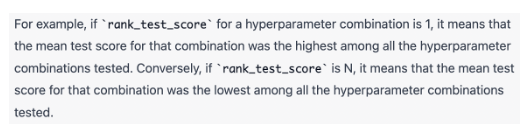

* Problem with GridSearchCV is that the number of combinations will increase with multiple hyperparameters like above
* With multiple hyperparameters through GridSearchCV, whole process will take lot of time with large data 
* Due to such probs we use RandomizedSearchCV

# RandomizedSearchCV

**RandomizedSearchCV** : Instead of making combinations with all the hyperparameters, it will select few of the combinations and does hyperparameter tuning.
* Due to which number of combinations are less and will yeild optimal results faster

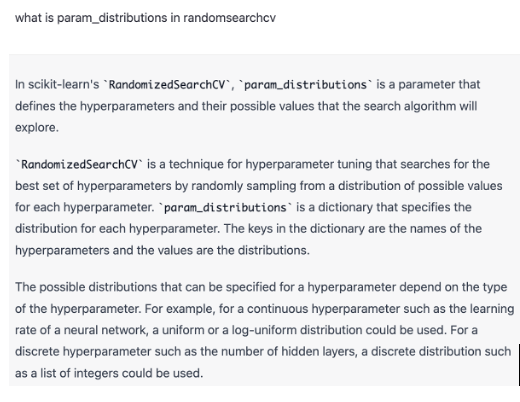

In [21]:
params1 = {'max_depth':list(range(2,50)), 'min_samples_split':[5,10,15,20,25,30]}

dtr = DecisionTreeRegressor()

rs = RandomizedSearchCV(estimator=dtr, 
                        param_distributions=params1, 
                        scoring='r2', cv=5).fit(xtrain, ytrain)
##### Manual
rs.best_params_, rs.best_score_


({'min_samples_split': 15, 'max_depth': 6}, 0.8328650624559206)

- Above result will be close to original optimal values due to randomized search
- But sometimes results won't be close to original optimal values

In [22]:
# If we want to know results of R2 scores for other max_depths use -> cv_results_
df_cv_results = pd.DataFrame(rs.cv_results_)
df_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001641,0.000131,0.000603,0.000020,25,26,"{'min_samples_split': 25, 'max_depth': 26}",0.849066,0.841268,0.790215,0.821295,0.795805,0.819530,0.023538,3
1,0.001616,0.000045,0.000616,0.000043,20,11,"{'min_samples_split': 20, 'max_depth': 11}",0.836384,0.835119,0.786405,0.810920,0.794307,0.812627,0.020476,6
2,0.001550,0.000022,0.000592,0.000029,25,34,"{'min_samples_split': 25, 'max_depth': 34}",0.849066,0.841268,0.790215,0.821295,0.795805,0.819530,0.023538,3
3,0.002019,0.000022,0.000608,0.000032,5,40,"{'min_samples_split': 5, 'max_depth': 40}",0.748158,0.776561,0.736124,0.753239,0.725813,0.747979,0.017184,9
4,0.001791,0.000032,0.000587,0.000006,10,35,"{'min_samples_split': 10, 'max_depth': 35}",0.815789,0.809825,0.740094,0.786299,0.796262,0.789654,0.026837,7
5,0.001527,0.000026,0.000571,0.000002,25,33,"{'min_samples_split': 25, 'max_depth': 33}",0.849066,0.841268,0.790215,0.821295,0.795805,0.819530,0.023538,3
6,0.002017,0.000045,0.000593,0.000006,5,48,"{'min_samples_split': 5, 'max_depth': 48}",0.734413,0.776579,0.736082,0.757825,0.711700,0.743320,0.022127,10
7,0.001527,0.000029,0.000574,0.000003,25,10,"{'min_samples_split': 25, 'max_depth': 10}",0.849561,0.841463,0.791459,0.821133,0.795794,0.819882,0.023393,2
8,0.001414,0.000006,0.000583,0.000011,15,6,"{'min_samples_split': 15, 'max_depth': 6}",0.873196,0.842067,0.810942,0.835127,0.802993,0.832865,0.024857,1
9,0.001784,0.000028,0.000592,0.000007,10,15,"{'min_samples_split': 10, 'max_depth': 15}",0.801914,0.809825,0.740103,0.786299,0.796262,0.786881,0.024613,8


Above we can see random cobinations of param_max_depth & param_min_samples_split.

In [23]:
df_cv_results[['params']]

,params
0,"{'min_samples_split': 25, 'max_depth': 26}"
1,"{'min_samples_split': 20, 'max_depth': 11}"
2,"{'min_samples_split': 25, 'max_depth': 34}"
3,"{'min_samples_split': 5, 'max_depth': 40}"
4,"{'min_samples_split': 10, 'max_depth': 35}"
5,"{'min_samples_split': 25, 'max_depth': 33}"
6,"{'min_samples_split': 5, 'max_depth': 48}"
7,"{'min_samples_split': 25, 'max_depth': 10}"
8,"{'min_samples_split': 15, 'max_depth': 6}"
9,"{'min_samples_split': 10, 'max_depth': 15}"


# * Note :- 1st try out RandomizedSearchCV to know the vicinity of combinations and then try out GridSearchCV to know the actual optimal values 

# <font color=blue>References

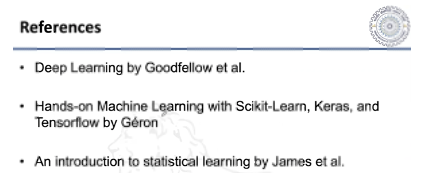